In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris



In [4]:
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()
#print(breast_cancer_dataset)

data_frame = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)
data_frame.head()

data_frame["label"] = breast_cancer_dataset.target
data_frame.tail()
data_frame.shape
data_frame.info()

data_frame.isnull().sum()

data_frame.describe()

data_frame["label"].value_counts()

data_frame.groupby("label").mean()

X = data_frame.drop(columns = "label", axis = 1)
Y = data_frame["label"]

print(X)
print(Y)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

standardized_data = scaler.fit_transform(X)

print(standardized_data)

X = standardized_data
print(X)

print(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

print("Total data: ", X.shape)
print("Train data: ", X_train.shape)
print("Test data: ", X_test.shape)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [6]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (30,)),
    keras.layers.Dense(20, activation = 'relu'),
    keras.layers.Dense(2, activation = "sigmoid")
])


In [7]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])


In [8]:
history = model.fit(X_train, Y_train, validation_split = 0.1, epochs = 10)

Epoch 1/10
13/13 [==============================] - 1s 19ms/step - loss: 0.8435 - accuracy: 0.4279 - val_loss: 0.6852 - val_accuracy: 0.5435
Epoch 2/10
13/13 [==============================] - 0s 6ms/step - loss: 0.6135 - accuracy: 0.6015 - val_loss: 0.4923 - val_accuracy: 0.7826
Epoch 3/10
13/13 [==============================] - 0s 6ms/step - loss: 0.4548 - accuracy: 0.8166 - val_loss: 0.3575 - val_accuracy: 0.8696
Epoch 4/10
13/13 [==============================] - 0s 8ms/step - loss: 0.3497 - accuracy: 0.8851 - val_loss: 0.2716 - val_accuracy: 0.9565
Epoch 5/10
13/13 [==============================] - 0s 7ms/step - loss: 0.2799 - accuracy: 0.9095 - val_loss: 0.2189 - val_accuracy: 0.9783
Epoch 6/10
13/13 [==============================] - 0s 6ms/step - loss: 0.2340 - accuracy: 0.9267 - val_loss: 0.1850 - val_accuracy: 0.9783
Epoch 7/10
13/13 [==============================] - 0s 7ms/step - loss: 0.2012 - accuracy: 0.9413 - val_loss: 0.1621 - val_accuracy: 0.9783
Epoch 8/10
13/13 [=

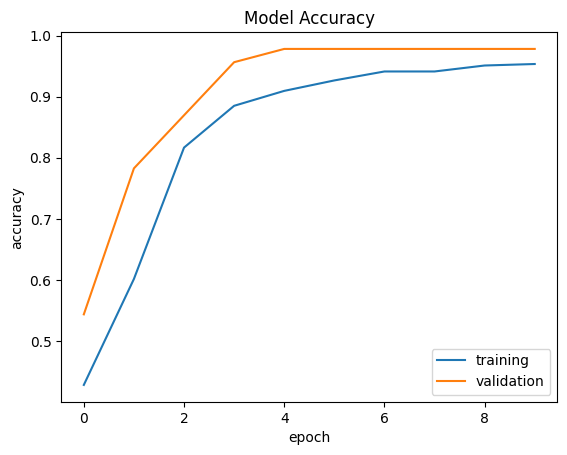

In [9]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

plt.title("Model Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")

plt.legend(["training", "validation"],loc = "lower right")

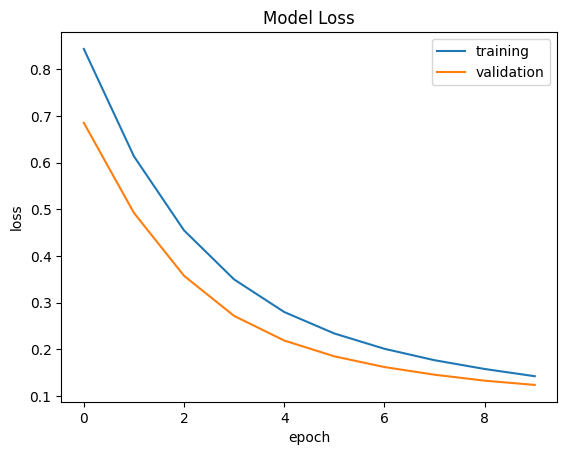

In [10]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.title("Model Loss")
plt.ylabel("loss")
plt.xlabel("epoch")

plt.legend(["training","validation"], loc = "upper right")

In [11]:
loss, accuracy = model.evaluate(X_test, Y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.1415 - accuracy: 0.9737


In [12]:
print(accuracy)

0.9736841917037964


In [13]:
print(X_test.shape)

(114, 30)


In [14]:
print(X_test[0])

[-0.05319351 -1.42408329 -0.06833592 -0.17260604  2.02392516 -0.1286992
  0.15317924  0.44445235  0.60014708  0.25125475  0.50863855  2.57300558
  0.60638318  0.09687179  0.99971423  0.3907719   0.52176832  2.71439431
 -0.41073446  0.65554594 -0.3415184  -1.67683887 -0.3795077  -0.3995439
  0.30822795 -0.74978636 -0.55789673 -0.19956318 -1.19838023 -0.63261684]


In [15]:
Y_pred = model.predict(X_test)

4/4 [==============================] - 0s 2ms/step


In [16]:
print(Y_pred.shape)

(114, 2)


In [17]:
print(Y_pred)

[[0.6228867  0.90692544]
 [0.52484566 0.74169475]
 [0.41461775 0.9459329 ]
 [0.999997   0.0480326 ]
 [0.616099   0.6192551 ]
 [0.9952649  0.06871875]
 [0.40961057 0.78867024]
 [0.57449377 0.97485536]
 [0.5920408  0.93291086]
 [0.6044824  0.9403389 ]
 [0.60989314 0.6484245 ]
 [0.4480621  0.81798416]
 [0.3700297  0.93454415]
 [0.5302597  0.8556264 ]
 [0.6080555  0.9499592 ]
 [0.99218136 0.5498369 ]
 [0.52150005 0.95140487]
 [0.30903128 0.8607682 ]
 [0.65384    0.9588401 ]
 [0.98437697 0.11037012]
 [0.30660844 0.06977162]
 [0.31316486 0.94899064]
 [0.41482934 0.95309824]
 [0.4340838  0.96079266]
 [0.40043804 0.80013543]
 [0.97809565 0.16045067]
 [0.397077   0.841298  ]
 [0.4713876  0.72174835]
 [0.98695046 0.2544099 ]
 [0.9819174  0.27796507]
 [0.5477312  0.8347806 ]
 [0.6184936  0.92148525]
 [0.42254877 0.85824376]
 [0.99988747 0.00537751]
 [0.98710567 0.07411702]
 [0.24713996 0.77407914]
 [0.40665212 0.994099  ]
 [0.51372653 0.9348603 ]
 [0.36418822 0.97189003]
 [0.46559885 0.906118  ]


In [18]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]


In [19]:
print(Y_pred_labels)


[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]


In [20]:
sample = data_frame.drop("label", axis = 1).iloc[0].values

input_data = (sample)
print(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data.reshape(1, -1)

# standardize the input data as model is trained as such
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = model.predict(std_data)
print(prediction)

predictin_label = [np.argmax(prediction)]
print(predictin_label)

if(predictin_label[0] == 0):
    print("The tumor is Malignant.")
else:
    print("The tumor is Benign.")

input_data = X_test[0]
print(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data.reshape(1, -1)

print(input_data_reshaped)

prediction = model.predict(input_data_reshaped)
print(prediction)

predictin_label = [np.argmax(prediction)]
print(predictin_label)

if(predictin_label[0] == 0):
    print("The tumor is Malignant.")
else:
    print("The tumor is Benign.")

[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
[[ 1.09706398 -2.07333501  1.26993369  0.9843749   1.56846633  3.28351467
   2.65287398  2.53247522  2.21751501  2.25574689  2.48973393 -0.56526506
   2.83303087  2.48757756 -0.21400165  1.31686157  0.72402616  0.66081994
   1.14875667  0.90708308  1.88668963 -1.35929347  2.30360062  2.00123749
   1.30768627  2.61666502  2.10952635  2.29607613  2.75062224  1.93701461]]
1/1 [==============================] - 0s 19ms/step
[[0.9998818  0.17775305]]
[0]
The tumor is Malignant.
[-0.05319351 -1.42408329 -0.06833592 -0.17260604  2.02392516 -0.1286992
  0.15317924  0.44445235  0.60014708  0.25125475  0.50863855  2.57300558
  0.60638318  0.09687179  0.99971423  0.3907719   0.52176832  2.7143943

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
